In [1]:
from google.colab import files
uploaded = files.upload()

Saving highway_image.jpg to highway_image.jpg


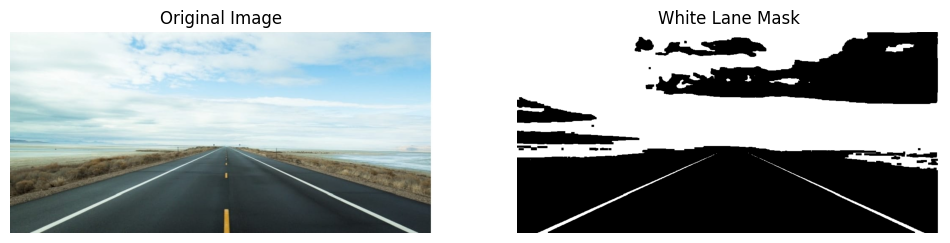

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "highway_image.jpg"
img = cv2.imread(image_path)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the white color range in HSV
lower_white = np.array([0, 0, 200])    # Lower bound of white
upper_white = np.array([180, 40, 255])  # Upper bound of white

# Create a binary mask for white lane markings
mask = cv2.inRange(img_hsv, lower_white, upper_white)

# Apply morphological operations to clean the mask
kernel = np.ones((5, 5), np.uint8)
mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Display the original image and the mask
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mask_cleaned, cmap="gray")
plt.axis("off")
plt.title("White Lane Mask")

plt.show()

# This method created a white lane mask but this has to be improved by removing the clouds using Contours


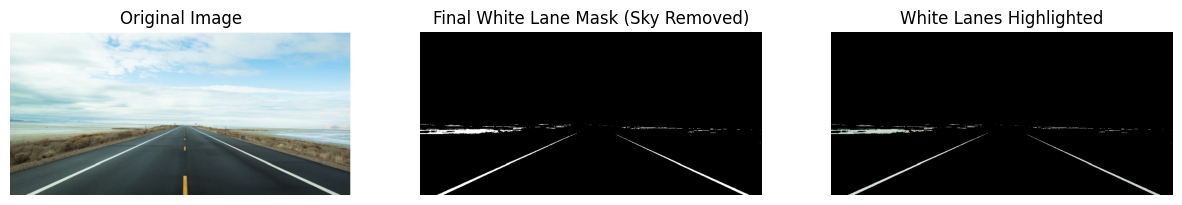

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "highway_image.jpg"
img = cv2.imread(image_path)

### STEP 1: Increase Resolution (Upscaling) ###
scale_factor = 2  # Upscale by 2x
img_high_res = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

# Convert to HSV
img_hsv = cv2.cvtColor(img_high_res, cv2.COLOR_BGR2HSV)

### STEP 2: Extract White Lanes ###
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 30, 255])
lane_mask = cv2.inRange(img_hsv, lower_white, upper_white)

### STEP 3: Detect Sky Using Contours ###
# Convert to grayscale and threshold
gray = cv2.cvtColor(img_high_res, cv2.COLOR_BGR2GRAY)
_, sky_thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(sky_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the sky
sky_mask = np.zeros_like(gray)

# Fill the largest contour (likely the sky)
for cnt in contours:
    if cv2.contourArea(cnt) > 10000:  # Increased area threshold to remove false positives
        cv2.drawContours(sky_mask, [cnt], -1, 255, thickness=cv2.FILLED)

# Remove sky from lane mask
sky_mask_inv = cv2.bitwise_not(sky_mask)
final_mask = cv2.bitwise_and(lane_mask, sky_mask_inv)

### STEP 4: Downscale Mask Back to Original Resolution ###
final_mask = cv2.resize(final_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

### STEP 5: Apply Mask to Original Image ###
white_lane_highlighted = cv2.bitwise_and(img, img, mask=final_mask)

### STEP 6: Display Results ###
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(final_mask, cmap="gray")
plt.axis("off")
plt.title("Final White Lane Mask (Sky Removed)")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(white_lane_highlighted, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("White Lanes Highlighted")

plt.show()


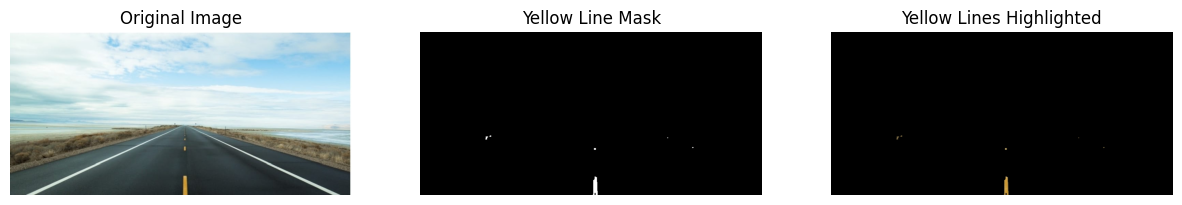

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "highway_image.jpg"
img = cv2.imread(image_path)

# Step 1: Increase Resolution (Upscaling)
scale_factor = 2  # Increase resolution by 2x
img_high_res = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

# Convert to HSV
img_hsv = cv2.cvtColor(img_high_res, cv2.COLOR_BGR2HSV)

# Step 2: Define Yellow Color Range (HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Apply mask
yellow_mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

# Step 3: Reduce Noise (Optional)
kernel = np.ones((5,5), np.uint8)
yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_CLOSE, kernel) # Close small gaps

# Step 4: Downscale Mask Back (Match Original Image Size)
yellow_mask_final = cv2.resize(yellow_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

# Step 5: Apply Mask to Original Image
yellow_highlighted = cv2.bitwise_and(img, img, mask=yellow_mask_final)

# Step 6: Display Results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(yellow_mask_final, cmap="gray")
plt.axis("off")
plt.title("Yellow Line Mask")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(yellow_highlighted, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Yellow Lines Highlighted")

plt.show()


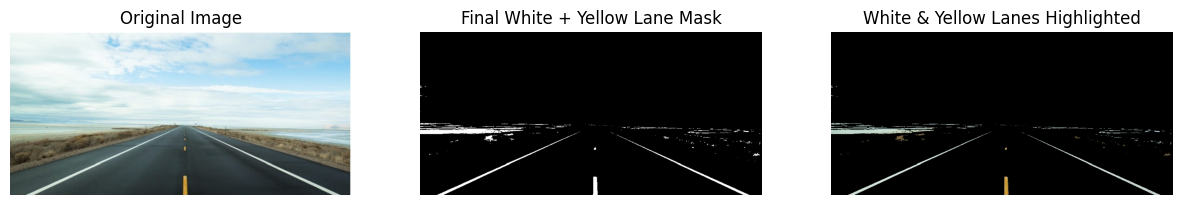

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "highway_image.jpg"
img = cv2.imread(image_path)

### STEP 1: Increase Resolution (Upscaling) ###
scale_factor = 2  # Upscale by 2x
img_high_res = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

# Convert to HSV
img_hsv = cv2.cvtColor(img_high_res, cv2.COLOR_BGR2HSV)

### STEP 2: Extract White and Yellow Lanes ###
# White lane detection
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 40, 255])
white_mask = cv2.inRange(img_hsv, lower_white, upper_white)

# Yellow lane detection
lower_yellow = np.array([15, 100, 100])
upper_yellow = np.array([35, 255, 255])
yellow_mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

# Combine white and yellow masks
combined_lane_mask = cv2.bitwise_or(white_mask, yellow_mask)

### STEP 3: Detect Sky Using Contours ###
# Convert to grayscale and threshold
gray = cv2.cvtColor(img_high_res, cv2.COLOR_BGR2GRAY)
_, sky_thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(sky_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the sky
sky_mask = np.zeros_like(gray)

# Fill the largest contour (likely the sky)
for cnt in contours:
    if cv2.contourArea(cnt) > 10000:  # Ignore small blobs
        cv2.drawContours(sky_mask, [cnt], -1, 255, thickness=cv2.FILLED)

# Remove sky from the lane mask
sky_mask_inv = cv2.bitwise_not(sky_mask)
final_mask = cv2.bitwise_and(combined_lane_mask, sky_mask_inv)

### STEP 4: Downscale Mask Back to Original Resolution ###
final_mask = cv2.resize(final_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

### STEP 5: Apply Mask to Original Image ###
highlighted_lanes = cv2.bitwise_and(img, img, mask=final_mask)

### STEP 6: Display Results ###
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(final_mask, cmap="gray")
plt.axis("off")
plt.title("Final White + Yellow Lane Mask")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(highlighted_lanes, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("White & Yellow Lanes Highlighted")

plt.show()
